In [4]:
import numpy as np
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
import  matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url='https://www.imdb.com/search/title/?title_type=feature&genres=crime&sort=num_votes,desc&start=51&ref_=adv_nxt'

In [232]:
movies=[]
rating=[]
metascore=[]
runtime=[]
genre=[]
release_year=[]
no_of_votes=[]
gross=[]
certificate=[]
for i in range(1,14):
    url=f'https://www.imdb.com/list/ls027704459/?sort=list_order,asc&st_dt=&mode=detail&page={i}'
    driver=webdriver.Chrome(r'C:\Users\nikhil\Downloads\chromedriver-win32\chromedriver-win32/chromedriver.exe')
    driver.get(url)
    
    time.sleep(2)
    soup=BeautifulSoup(driver.page_source,'html.parser')
    driver.close()
    container=soup.find_all('div',class_='lister-item-content')
    for i in container:
        a=i.find('h3',class_='lister-item-header')
        title=a.a.text
        movies.append(title)
    for i in container:
        d=i.find('div',class_='inline-block ratings-metascore')
        if d:
            regex=re.findall('\d+',d.text)
            metascore.append(regex[0])
        else:
            metascore.append(np.nan)
    for i in container:
        f=i.find('span',class_='genre')
        if f:
            regex=re.findall(r"^\s*(.*?)\s*$",f.text)
            genre.append(regex[0])
        else:
            genre.append(np.nan)
    for i in container:
        year=i.find('span',class_='lister-item-year text-muted unbold')
        regex=re.findall('\d+',year.text)
        if regex:
            release_year.append(regex[0])
        else:
            release_year.append(np.nan)
    for i in container:
        c=i.find('span',attrs={'name':'nv'})
        if c:
            no_of_votes.append(c.text)
        else:
            no_of_votes.append(np.nan)
    for i in container:
        c=i.find_all('span',attrs={'name':'nv'})  
        if len(c) == 2:
            gross.append(c[1].text)
        else:
            gross.append(np.nan)
    for i in container:
        g=i.find('span',class_='certificate')
        if g:
            certificate.append(g.text)
        else:
            certificate.append(np.nan)
    for i in container:
        b=i.find('div',attrs={'class':'ipl-rating-widget'})
        if b:
            regex=re.findall('(\d+\.?\d+)',b.text)
            rating.append(regex[0])
        else:
            rating.append(np.nan)
    for i in container:
        e=i.find('span',class_='runtime')
        if e:
            regex=re.findall('\d+',e.text)
            runtime.append(regex[0])
        else:
            runtime.append(np.nan)
    

C:\Users\nikhil\AppData\Local\Temp\ipykernel_9092\4071657770.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(r'C:\Users\nikhil\Downloads\chromedriver-win32\chromedriver-win32/chromedriver.exe')


In [209]:
runtime=[]
container=soup.find_all('div',class_='lister-item-content')
for i in container:
    e=i.find('span',class_='runtime')
    if e:
        regex=re.findall('\d+',e.text)
        runtime.append(regex[0])
    else:
        runtime.append(np.nan)
print(runtime)

['100', '107', '89', '125', '91', '92', '95', '114', '109', '132', '110', '103', '91', '105', '127', '108', '119', '136', '121', '90', '110', '85', '119', '153', '113', '95', '112', '99', '102', '87', '88', '94', '95', '84', '157', '111', '103', '101', '90', '101', '110', '122', '98', '115', '93', '144', '115', '115', '106', '118', '115', '97', '87', '144', '132', '111', '102', '104', '110', '98', '99', '95', '90', '85', '115', '84', '131', '110', '82', '103', '100', '107', '116', '107', '117', '103', '99', '120', '116', '88', '91', '89', '111', '100', '90', '144', '91', '100', '117', '90', '100', '106', '129', '45', '30', '60', '321', '45', '109', '84']


In [229]:
rating=[]
for i in container:
        b=i.find('div',attrs={'class':'ipl-rating-widget'})
        print(b)
        if b:
            regex=re.findall('(\d+\.?\d+)',b.text)
        if regex:
            rating.append(regex[0])
        else:
            rating.append(np.nan)
rating

<div class="ipl-rating-widget">
<div class="ipl-rating-star small">
<span class="ipl-rating-star__star">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
</span>
<span class="ipl-rating-star__rating">4.9</span>
</div>
<div class="ipl-rating-interactive small ipl-rating-interactive--no-rating">
<input class="ipl-rating-interactive__state" data-reftag="ur_rt" data-tconst="tt4442130" id="checkbox-tt4442130" type="checkbox"/>
<label class="ipl-rating-interactive__star-container" for="checkbox-tt4442130">
<div class="ipl-rating-star ipl-rating-interactive__star">
<span class="ipl-rating-star__star">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.

<div class="ipl-rating-widget">
<div class="ipl-rating-star small">
<span class="ipl-rating-star__star">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
</span>
<span class="ipl-rating-star__rating">4.4</span>
</div>
<div class="ipl-rating-interactive small ipl-rating-interactive--no-rating">
<input class="ipl-rating-interactive__state" data-reftag="ur_rt" data-tconst="tt0380201" id="checkbox-tt0380201" type="checkbox"/>
<label class="ipl-rating-interactive__star-container" for="checkbox-tt0380201">
<div class="ipl-rating-star ipl-rating-interactive__star">
<span class="ipl-rating-star__star">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.

<div class="ipl-rating-widget">
<div class="ipl-rating-star small">
<span class="ipl-rating-star__star">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
</span>
<span class="ipl-rating-star__rating">5.8</span>
</div>
<div class="ipl-rating-interactive small ipl-rating-interactive--no-rating">
<input class="ipl-rating-interactive__state" data-reftag="ur_rt" data-tconst="tt2113636" id="checkbox-tt2113636" type="checkbox"/>
<label class="ipl-rating-interactive__star-container" for="checkbox-tt2113636">
<div class="ipl-rating-star ipl-rating-interactive__star">
<span class="ipl-rating-star__star">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.

<div class="ipl-rating-widget">
<div class="ipl-rating-star small">
<span class="ipl-rating-star__star">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
</span>
<span class="ipl-rating-star__rating">5.2</span>
</div>
<div class="ipl-rating-interactive small ipl-rating-interactive--no-rating">
<input class="ipl-rating-interactive__state" data-reftag="ur_rt" data-tconst="tt4444956" id="checkbox-tt4444956" type="checkbox"/>
<label class="ipl-rating-interactive__star-container" for="checkbox-tt4444956">
<div class="ipl-rating-star ipl-rating-interactive__star">
<span class="ipl-rating-star__star">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.

['4.9',
 '5.7',
 '5.7',
 '6.5',
 '6.2',
 '5.3',
 '5.8',
 '6.1',
 '6.2',
 '6.9',
 '5.9',
 '7.2',
 '5.2',
 '6.2',
 '7.1',
 '5.4',
 '6.8',
 '6.7',
 '6.3',
 '6.3',
 '5.2',
 '6.3',
 '6.3',
 '7.1',
 '6.7',
 '5.4',
 '6.5',
 '5.5',
 '5.6',
 '5.7',
 '4.1',
 '5.5',
 '10',
 '4.6',
 '7.8',
 '6.4',
 '4.4',
 '5.6',
 '5.2',
 '5.6',
 '5.9',
 '7.3',
 '5.9',
 '6.4',
 '6.2',
 '6.8',
 '6.2',
 '4.4',
 '6.1',
 '6.5',
 '6.3',
 '6.3',
 '10',
 '7.8',
 '7.1',
 '6.8',
 '6.1',
 '7.6',
 '6.4',
 '4.3',
 '6.6',
 '5.7',
 '6.1',
 '5.8',
 '6.3',
 '6.8',
 '7.4',
 '4.4',
 '4.4',
 '4.7',
 '5.4',
 '7.1',
 '7.3',
 '6.1',
 '6.2',
 '10',
 '6.1',
 '6.7',
 '5.7',
 '6.1',
 '5.7',
 '5.3',
 '5.2',
 '4.8',
 '4.4',
 '10',
 '6.3',
 '10',
 '7.1',
 '5.1',
 '5.4',
 '5.3',
 '7.2',
 '6.6',
 '6.8',
 '7.7',
 '7.4',
 '10',
 '6.7',
 '5.7']

In [233]:
print(len(movies))
print(len(rating))
print(len(metascore))
print(len(runtime))
print(len(genre))
print(len(release_year))
print(len(no_of_votes))
print(len(gross))
print(len(certificate))

1300
1300
1300
1300
1300
1300
1300
1300
1300


In [234]:
IMDB={'Movies':movies,'Rating':rating,'MetaScore':metascore,'Movie_Runtime':runtime,'Genre':genre,'Year_of_Release':release_year,
 'Votes':no_of_votes,
'Gross_amount':gross,
'Certificate':certificate}

In [235]:
Data=pd.DataFrame(IMDB)

In [236]:
Data

Movies Rating MetaScore Movie_Runtime                     Genre  \
0         16 Blocks    6.6        63           102   Action, Drama, Thriller   
1           Hostage    6.5        44           113      Action, Crime, Drama   
2        Layer Cake    7.3        73           105      Action, Crime, Drama   
3           Lawless    7.2        58           116   Biography, Crime, Drama   
4          Child 44    6.4        41           137     Crime, Drama, History   
...             ...    ...       ...           ...                       ...   
1295  Before We Die    7.7       NaN            60  Drama, Mystery, Thriller   
1296            DNA    7.4       NaN           321     Crime, Drama, Mystery   
1297     The Lawyer     10       NaN            45     Crime, Drama, Mystery   
1298  The Good Liar    6.7        55           109     Crime, Drama, Mystery   
1299   Next Day Air    5.7        46            84     Action, Comedy, Crime   

     Year_of_Release    Votes Gross_amount Certificate  
0               2006  133,165      $36.90M       PG-13  
1               2005  112,468      $34.64M           R  
2               2004  189,380       $2.34M           R  
3               2012  248,397      $37.40M           R  
4               2015   73,920       $1.21M           R  
...              ...      ...          ...         ...  
1295            2017    4,635          NaN       TV-MA  
1296            2019    3,220          NaN         NaN  
1297            2018    1,826          NaN         NaN  
1298            2019   45,114          NaN           R  
1299            2009   10,987      $10.02M           R  

[1300 rows x 9 columns]

In [237]:
Data.nunique()

Movies             1284
Rating               62
MetaScore            78
Movie_Runtime       117
Genre               108
Year_of_Release      27
Votes              1253
Gross_amount        398
Certificate          11
dtype: int64

In [396]:
Data['Year_of_Release']=Data['Year_of_Release'].astype('int64',errors='ignore')

In [397]:
Data['Year_of_Release'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1300 entries, 0 to 1299
Series name: Year_of_Release
Non-Null Count  Dtype 
--------------  ----- 
1298 non-null   object
dtypes: object(1)
memory usage: 10.3+ KB


In [398]:
Data.to_csv('IMDB_crime.csv')

In [5]:
df=pd.read_csv('IMDB_crime.csv')

In [6]:
df

Unnamed: 0         Movies  Rating  MetaScore  Movie_Runtime  \
0              0      16 Blocks     6.6       63.0          102.0   
1              1        Hostage     6.5       44.0          113.0   
2              2     Layer Cake     7.3       73.0          105.0   
3              3        Lawless     7.2       58.0          116.0   
4              4       Child 44     6.4       41.0          137.0   
...          ...            ...     ...        ...            ...   
1295        1295  Before We Die     7.7        NaN           60.0   
1296        1296            DNA     7.4        NaN          321.0   
1297        1297     The Lawyer    10.0        NaN           45.0   
1298        1298  The Good Liar     6.7       55.0          109.0   
1299        1299   Next Day Air     5.7       46.0           84.0   

                         Genre  Year_of_Release    Votes Gross_amount  \
0      Action, Drama, Thriller           2006.0  133,165      $36.90M   
1         Action, Crime, Drama           2005.0  112,468      $34.64M   
2         Action, Crime, Drama           2004.0  189,380       $2.34M   
3      Biography, Crime, Drama           2012.0  248,397      $37.40M   
4        Crime, Drama, History           2015.0   73,920       $1.21M   
...                        ...              ...      ...          ...   
1295  Drama, Mystery, Thriller           2017.0    4,635          NaN   
1296     Crime, Drama, Mystery           2019.0    3,220          NaN   
1297     Crime, Drama, Mystery           2018.0    1,826          NaN   
1298     Crime, Drama, Mystery           2019.0   45,114          NaN   
1299     Action, Comedy, Crime           2009.0   10,987      $10.02M   

     Certificate  
0          PG-13  
1              R  
2              R  
3              R  
4              R  
...          ...  
1295       TV-MA  
1296         NaN  
1297         NaN  
1298           R  
1299           R  

[1300 rows x 10 columns]

In [7]:
df.head()

Unnamed: 0      Movies  Rating  MetaScore  Movie_Runtime  \
0           0   16 Blocks     6.6       63.0          102.0   
1           1     Hostage     6.5       44.0          113.0   
2           2  Layer Cake     7.3       73.0          105.0   
3           3     Lawless     7.2       58.0          116.0   
4           4    Child 44     6.4       41.0          137.0   

                     Genre  Year_of_Release    Votes Gross_amount Certificate  
0  Action, Drama, Thriller           2006.0  133,165      $36.90M       PG-13  
1     Action, Crime, Drama           2005.0  112,468      $34.64M           R  
2     Action, Crime, Drama           2004.0  189,380       $2.34M           R  
3  Biography, Crime, Drama           2012.0  248,397      $37.40M           R  
4    Crime, Drama, History           2015.0   73,920       $1.21M           R

In [8]:
df.tail()

Unnamed: 0         Movies  Rating  MetaScore  Movie_Runtime  \
1295        1295  Before We Die     7.7        NaN           60.0   
1296        1296            DNA     7.4        NaN          321.0   
1297        1297     The Lawyer    10.0        NaN           45.0   
1298        1298  The Good Liar     6.7       55.0          109.0   
1299        1299   Next Day Air     5.7       46.0           84.0   

                         Genre  Year_of_Release   Votes Gross_amount  \
1295  Drama, Mystery, Thriller           2017.0   4,635          NaN   
1296     Crime, Drama, Mystery           2019.0   3,220          NaN   
1297     Crime, Drama, Mystery           2018.0   1,826          NaN   
1298     Crime, Drama, Mystery           2019.0  45,114          NaN   
1299     Action, Comedy, Crime           2009.0  10,987      $10.02M   

     Certificate  
1295       TV-MA  
1296         NaN  
1297         NaN  
1298           R  
1299           R

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1300 non-null   int64  
 1   Movies           1300 non-null   object 
 2   Rating           1297 non-null   float64
 3   MetaScore        649 non-null    float64
 4   Movie_Runtime    1288 non-null   float64
 5   Genre            1299 non-null   object 
 6   Year_of_Release  1298 non-null   float64
 7   Votes            1296 non-null   object 
 8   Gross_amount     543 non-null    object 
 9   Certificate      1065 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 101.7+ KB


In [10]:
df=df.drop('Unnamed: 0',axis=1)

In [11]:
df

Movies  Rating  MetaScore  Movie_Runtime  \
0         16 Blocks     6.6       63.0          102.0   
1           Hostage     6.5       44.0          113.0   
2        Layer Cake     7.3       73.0          105.0   
3           Lawless     7.2       58.0          116.0   
4          Child 44     6.4       41.0          137.0   
...             ...     ...        ...            ...   
1295  Before We Die     7.7        NaN           60.0   
1296            DNA     7.4        NaN          321.0   
1297     The Lawyer    10.0        NaN           45.0   
1298  The Good Liar     6.7       55.0          109.0   
1299   Next Day Air     5.7       46.0           84.0   

                         Genre  Year_of_Release    Votes Gross_amount  \
0      Action, Drama, Thriller           2006.0  133,165      $36.90M   
1         Action, Crime, Drama           2005.0  112,468      $34.64M   
2         Action, Crime, Drama           2004.0  189,380       $2.34M   
3      Biography, Crime, Drama           2012.0  248,397      $37.40M   
4        Crime, Drama, History           2015.0   73,920       $1.21M   
...                        ...              ...      ...          ...   
1295  Drama, Mystery, Thriller           2017.0    4,635          NaN   
1296     Crime, Drama, Mystery           2019.0    3,220          NaN   
1297     Crime, Drama, Mystery           2018.0    1,826          NaN   
1298     Crime, Drama, Mystery           2019.0   45,114          NaN   
1299     Action, Comedy, Crime           2009.0   10,987      $10.02M   

     Certificate  
0          PG-13  
1              R  
2              R  
3              R  
4              R  
...          ...  
1295       TV-MA  
1296         NaN  
1297         NaN  
1298           R  
1299           R  

[1300 rows x 9 columns]

In [12]:
df['Certificate'].unique()

array(['PG-13', 'R', 'Not Rated', nan, 'TV-14', 'PG', 'Unrated', 'TV-MA',
       'NC-17', 'TV-PG', 'UA', 'A'], dtype=object)

In [13]:
df['Year_of_Release']=df['Year_of_Release'].fillna(method='ffill').astype('int')

In [14]:
# Convert 'Votes' to float, remove commas, and convert special values like 'Not available' to NaN
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))


In [15]:
def convert_gross_amount(amount):
    if pd.isna(amount):
        return amount
    amount = str(amount).replace('$', '').replace(',', '').strip()
    if amount.endswith('M'):
        return float(amount[:-1]) * 1_000_000
    elif amount.endswith('K'):
        return float(amount[:-1]) * 1_000
    else:
        return float(amount)

# Convert 'Gross_amount' using the specified condition
df['Gross_amount'] = df['Gross_amount'].apply(convert_gross_amount)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Movies           1300 non-null   object 
 1   Rating           1297 non-null   float64
 2   MetaScore        649 non-null    float64
 3   Movie_Runtime    1288 non-null   float64
 4   Genre            1299 non-null   object 
 5   Year_of_Release  1300 non-null   int32  
 6   Votes            1296 non-null   float64
 7   Gross_amount     543 non-null    float64
 8   Certificate      1065 non-null   object 
dtypes: float64(5), int32(1), object(3)
memory usage: 86.5+ KB


In [17]:
df['MetaScore'].fillna(df['MetaScore'].mean(), inplace=True)

In [18]:
df['Gross_amount'].fillna(df['Gross_amount'].mean(), inplace=True)

In [19]:
df['Certificate'].fillna('Not Rated', inplace=True)

In [20]:
df=df.dropna()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Movies           1286 non-null   object 
 1   Rating           1286 non-null   float64
 2   MetaScore        1286 non-null   float64
 3   Movie_Runtime    1286 non-null   float64
 4   Genre            1286 non-null   object 
 5   Year_of_Release  1286 non-null   int32  
 6   Votes            1286 non-null   float64
 7   Gross_amount     1286 non-null   float64
 8   Certificate      1286 non-null   object 
dtypes: float64(5), int32(1), object(3)
memory usage: 95.4+ KB


In [22]:
df['MetaScore'] = df['MetaScore'].astype(int)  
df['Movie_Runtime'] = df['Movie_Runtime'].astype(int)  
df['Year_of_Release'] = df['Year_of_Release'].astype(int)  
df['Votes'] = df['Votes'].astype(int) 
df['Gross_amount'] = df['Gross_amount'].astype(int)  

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Movies           1286 non-null   object 
 1   Rating           1286 non-null   float64
 2   MetaScore        1286 non-null   int32  
 3   Movie_Runtime    1286 non-null   int32  
 4   Genre            1286 non-null   object 
 5   Year_of_Release  1286 non-null   int32  
 6   Votes            1286 non-null   int32  
 7   Gross_amount     1286 non-null   int32  
 8   Certificate      1286 non-null   object 
dtypes: float64(1), int32(5), object(3)
memory usage: 75.4+ KB


In [24]:
df

Movies  Rating  MetaScore  Movie_Runtime  \
0         16 Blocks     6.6         63            102   
1           Hostage     6.5         44            113   
2        Layer Cake     7.3         73            105   
3           Lawless     7.2         58            116   
4          Child 44     6.4         41            137   
...             ...     ...        ...            ...   
1295  Before We Die     7.7         55             60   
1296            DNA     7.4         55            321   
1297     The Lawyer    10.0         55             45   
1298  The Good Liar     6.7         55            109   
1299   Next Day Air     5.7         46             84   

                         Genre  Year_of_Release   Votes  Gross_amount  \
0      Action, Drama, Thriller             2006  133165      36900000   
1         Action, Crime, Drama             2005  112468      34640000   
2         Action, Crime, Drama             2004  189380       2340000   
3      Biography, Crime, Drama             2012  248397      37400000   
4        Crime, Drama, History             2015   73920       1210000   
...                        ...              ...     ...           ...   
1295  Drama, Mystery, Thriller             2017    4635      24641675   
1296     Crime, Drama, Mystery             2019    3220      24641675   
1297     Crime, Drama, Mystery             2018    1826      24641675   
1298     Crime, Drama, Mystery             2019   45114      24641675   
1299     Action, Comedy, Crime             2009   10987      10020000   

     Certificate  
0          PG-13  
1              R  
2              R  
3              R  
4              R  
...          ...  
1295       TV-MA  
1296   Not Rated  
1297   Not Rated  
1298           R  
1299           R  

[1286 rows x 9 columns]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Movies           1286 non-null   object 
 1   Rating           1286 non-null   float64
 2   MetaScore        1286 non-null   int32  
 3   Movie_Runtime    1286 non-null   int32  
 4   Genre            1286 non-null   object 
 5   Year_of_Release  1286 non-null   int32  
 6   Votes            1286 non-null   int32  
 7   Gross_amount     1286 non-null   int32  
 8   Certificate      1286 non-null   object 
dtypes: float64(1), int32(5), object(3)
memory usage: 75.4+ KB


# UNIVARIANT ANALYSIS

In [26]:
## UNIVARIANT ANALYSIS ON CATEGORICAL DATA

In [27]:

#statistical analysis on movie release year to know the no of movies released on a particular year
x=df['Year_of_Release'].value_counts()[:10]
print(x)

2017    89
2016    80
2007    79
2014    78
2013    77
2018    72
2012    70
2008    69
2009    68
2015    65
Name: Year_of_Release, dtype: int64


In [28]:
y=df['Year_of_Release'].value_counts()[:10].index
print(y)

Int64Index([2017, 2016, 2007, 2014, 2013, 2018, 2012, 2008, 2009, 2015], dtype='int64')


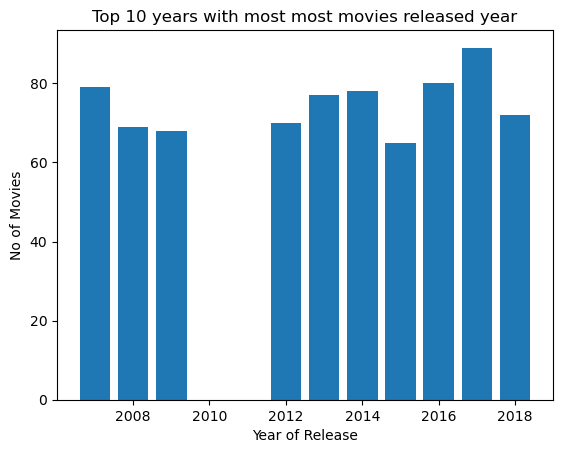

In [29]:
plt.bar(y,x)
plt.title('Top 10 years with most most movies released year')
plt.xlabel('Year of Release')
plt.ylabel('No of Movies')
plt.show()

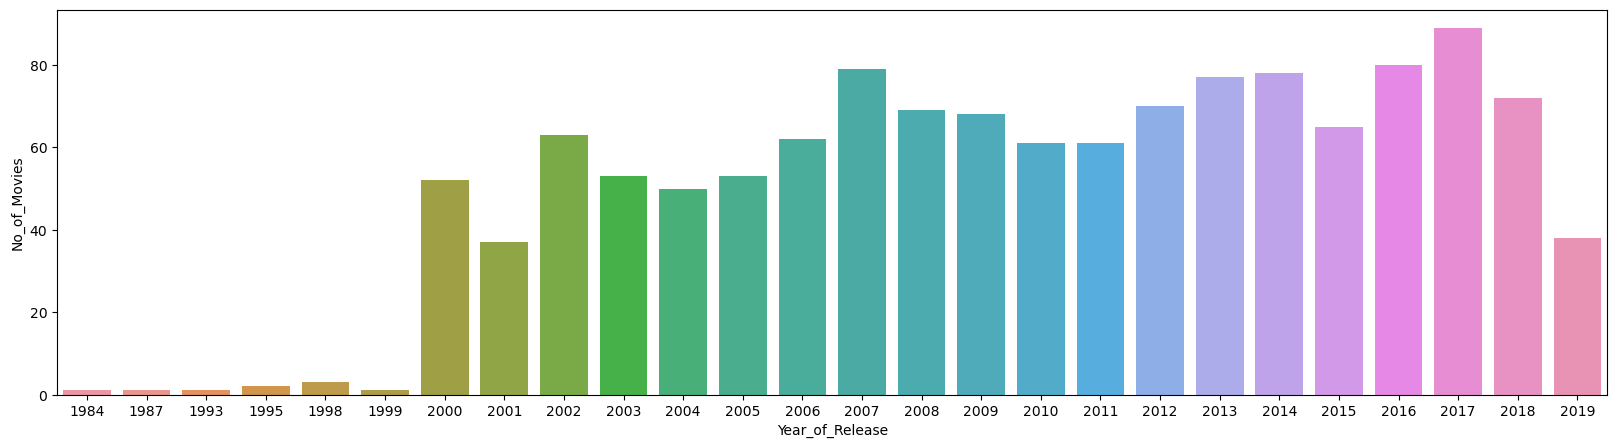

In [30]:
fig,axs=plt.subplots(figsize=(20,5))
sns.countplot(x='Year_of_Release',data=df)
plt.xlabel('Year_of_Release')
plt.ylabel('No_of_Movies')
plt.show()

In [31]:
z=df['Year_of_Release'].value_counts()[:8]
z

2017    89
2016    80
2007    79
2014    78
2013    77
2018    72
2012    70
2008    69
Name: Year_of_Release, dtype: int64

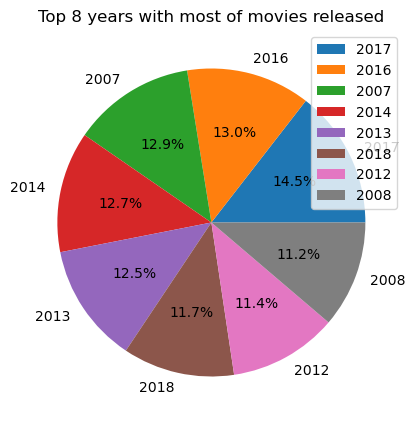

In [32]:
plt.figure(figsize=(5,5))
plt.pie(z,labels=df['Year_of_Release'].value_counts()[:8].index,autopct='%0.1f%%')
plt.title('Top 8 years with most of movies released')
plt.legend(labels=df['Year_of_Release'].value_counts()[:8].index)
plt.show()

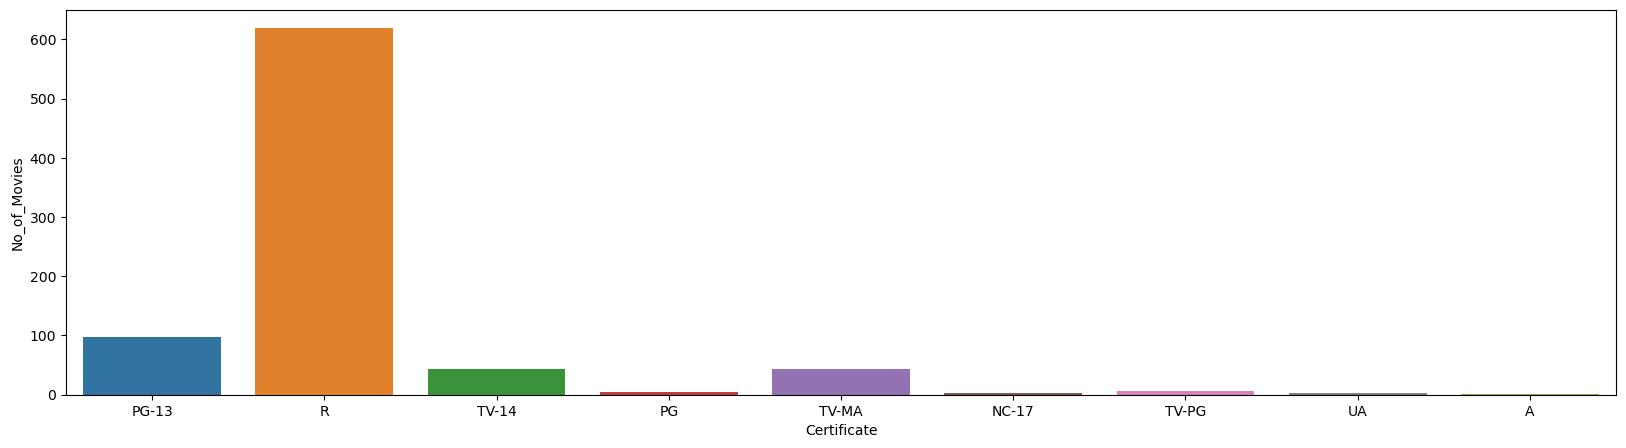

In [31]:
fig,axs=plt.subplots(figsize=(20,5))
sns.countplot(x='Certificate',data=df[~df['Certificate'].isin(['Unrated', 'Not Rated'])])
plt.xlabel('Certificate')
plt.ylabel('No_of_Movies')
plt.show()

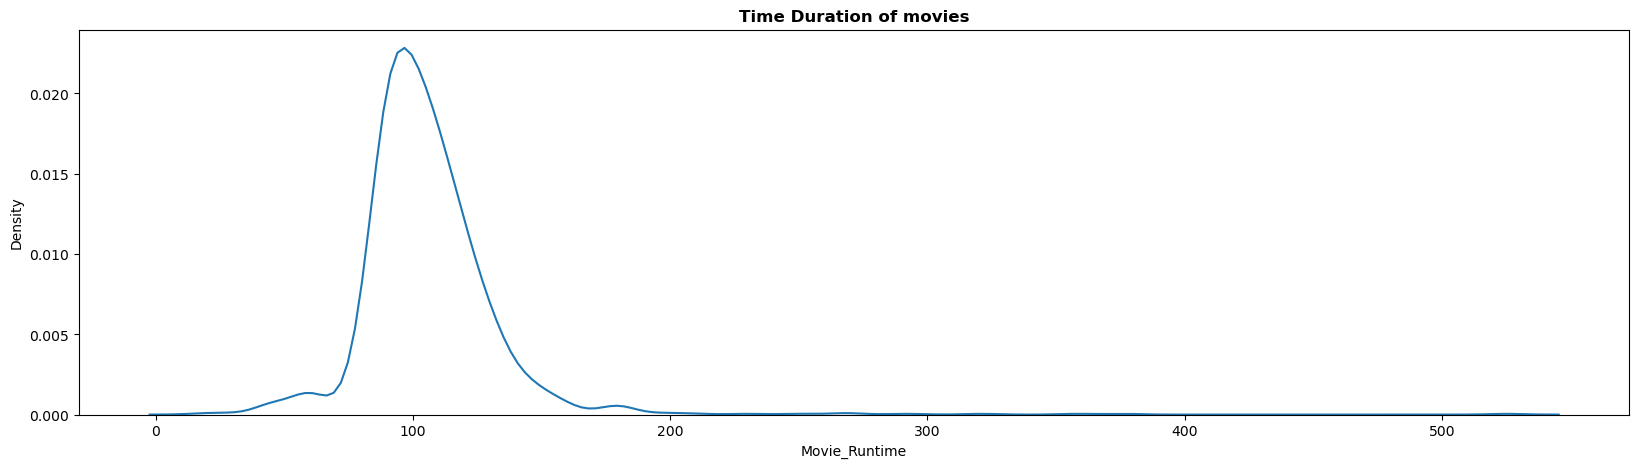

In [32]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.kdeplot(df['Movie_Runtime'])
g.set_title("Time Duration of movies", weight = "bold")
plt.show()

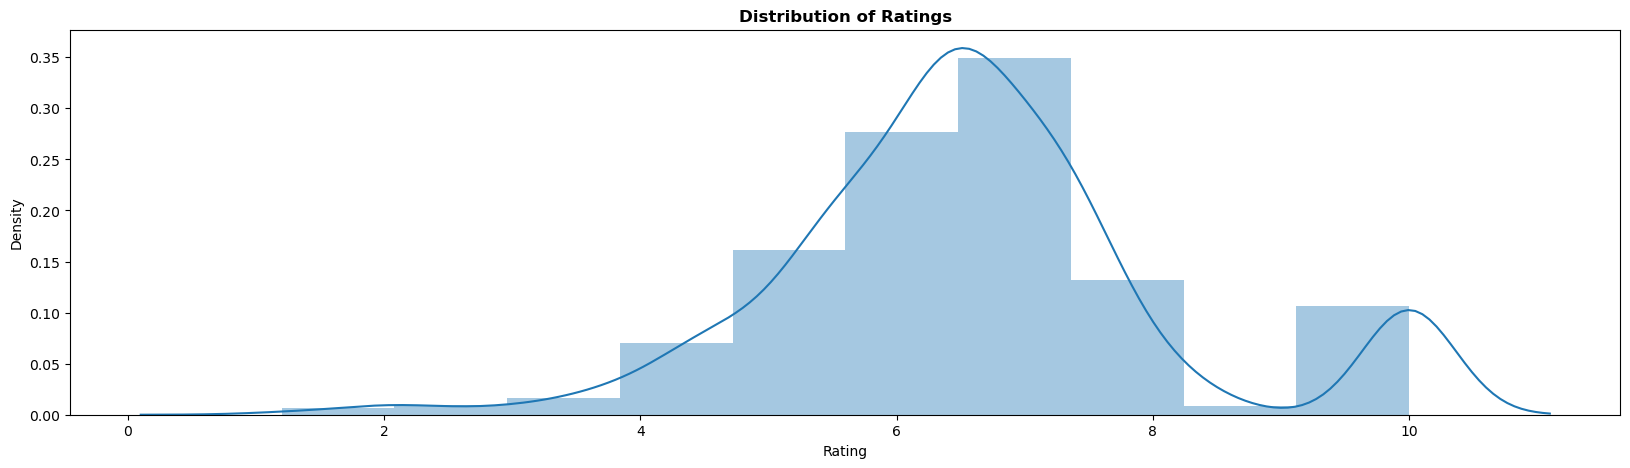

In [33]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.distplot(df['Rating'],bins=10)
g.set_title("Distribution of Ratings", weight = "bold")
plt.show()

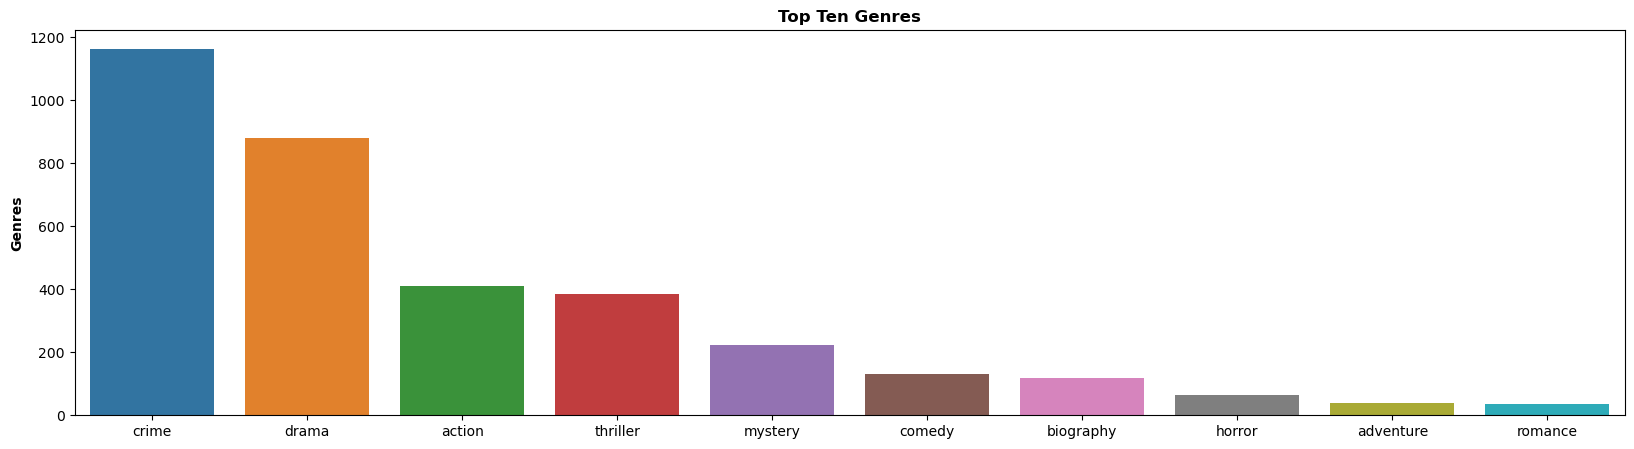

In [34]:
from collections import Counter
genre=[]
for x in df['Genre']:
    for y in x.split(','):
        genre.append(y.strip().lower())
count = Counter(genre)
count = count.most_common()[:10]
x, y = map(list, zip(*count))
# Create a bar plot to visualize the top ten genres and their counts
fig, axs = plt.subplots(figsize=(20, 5))
g = sns.barplot(x=x, y=y)
g.set_ylabel("Genres", weight="bold")
g.set_title("Top Ten Genres", weight="bold")
plt.show()

In [35]:
#on Numerical columns

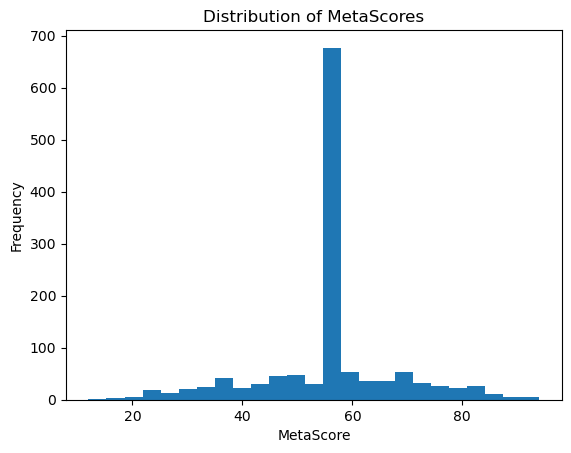

In [36]:
df['MetaScore'].plot(kind='hist', bins=25)
plt.xlabel('MetaScore')
plt.ylabel('Frequency')
plt.title('Distribution of MetaScores')
plt.show()

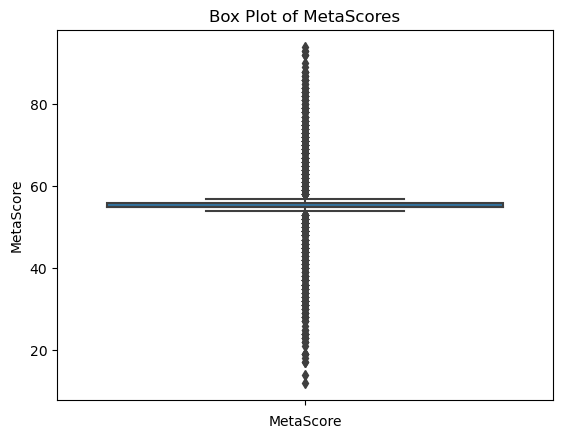

In [37]:
sns.boxplot(data=df, y='MetaScore')
plt.xlabel('MetaScore')
plt.title('Box Plot of MetaScores')
plt.show()

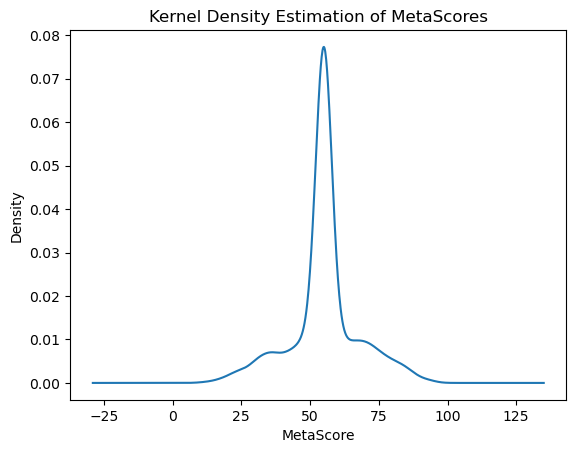

In [38]:
df['MetaScore'].plot(kind='kde')
plt.xlabel('MetaScore')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of MetaScores')
plt.show()

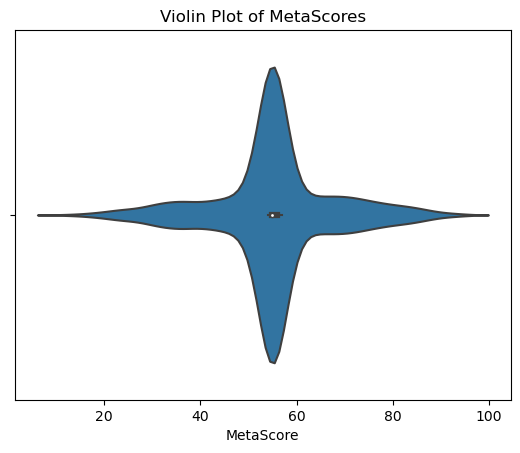

In [39]:
sns.violinplot(data=df, x='MetaScore')
plt.xlabel('MetaScore')
plt.title('Violin Plot of MetaScores')
plt.show()

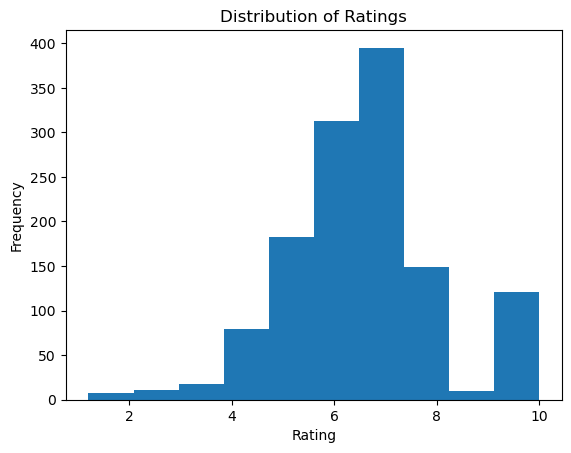

In [40]:
df['Rating'].plot(kind='hist', bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

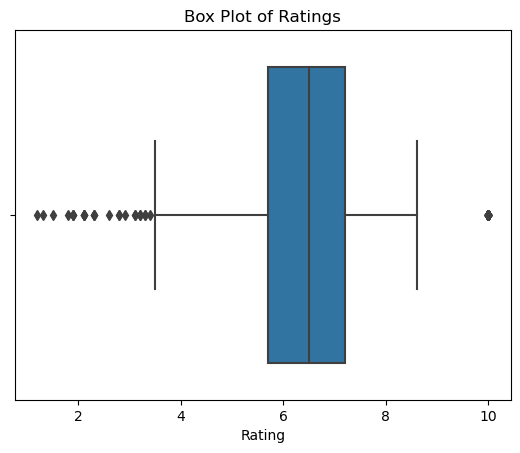

In [41]:
sns.boxplot(data=df, x='Rating')
plt.xlabel('Rating')
plt.title('Box Plot of Ratings')
plt.show()

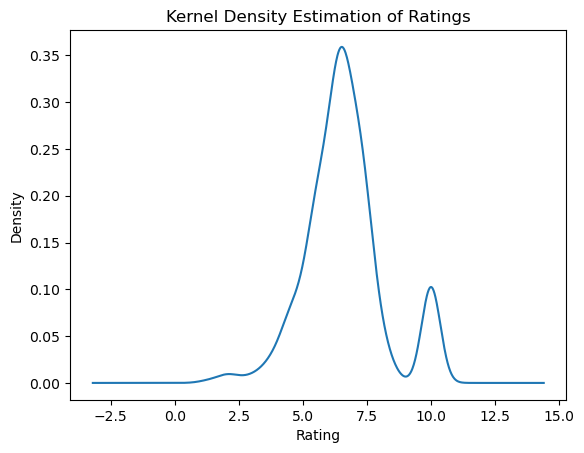

In [42]:
df['Rating'].plot(kind='kde')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Ratings')
plt.show()

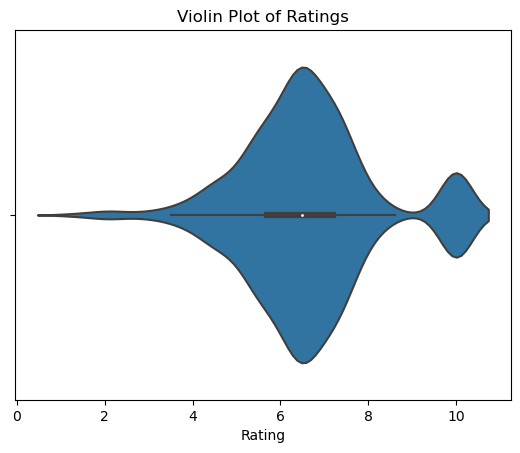

In [43]:
sns.violinplot(data=df, x='Rating')
plt.xlabel('Rating')
plt.title('Violin Plot of Ratings')
plt.show()

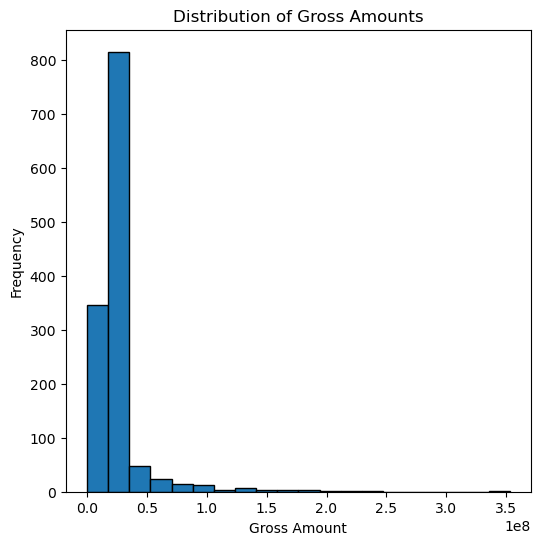

In [44]:
plt.figure(figsize=(6, 6))
df['Gross_amount'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Gross Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Gross Amounts')
plt.show()

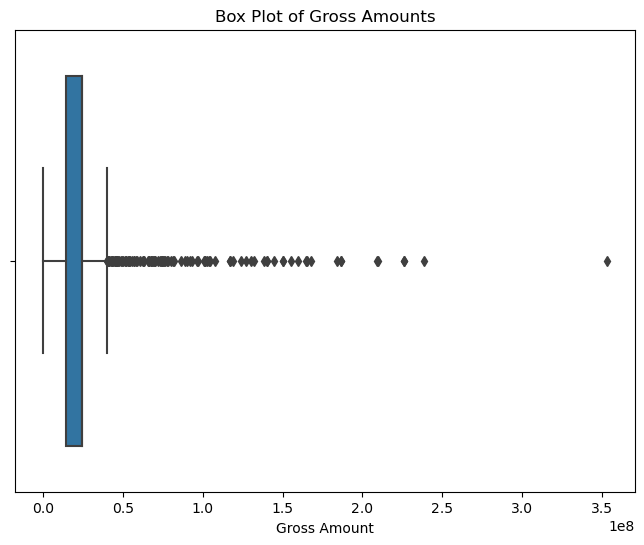

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gross_amount')
plt.xlabel('Gross Amount')
plt.title('Box Plot of Gross Amounts')
plt.show()

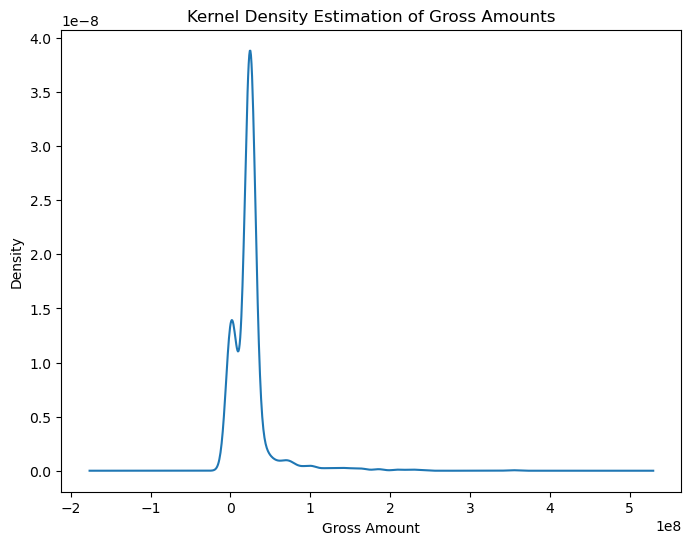

In [46]:
plt.figure(figsize=(8, 6))
df['Gross_amount'].plot(kind='kde')
plt.xlabel('Gross Amount')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Gross Amounts')
plt.show()

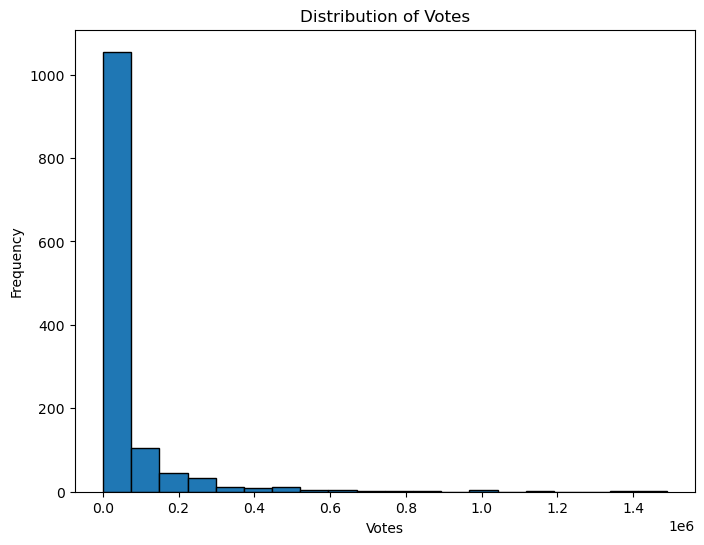

In [47]:
plt.figure(figsize=(8, 6))
df['Votes'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.title('Distribution of Votes')
plt.show()

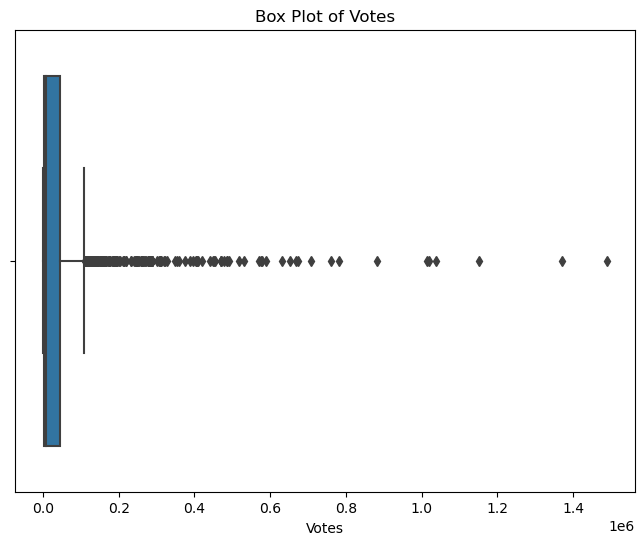

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Votes')
plt.xlabel('Votes')
plt.title('Box Plot of Votes')
plt.show()

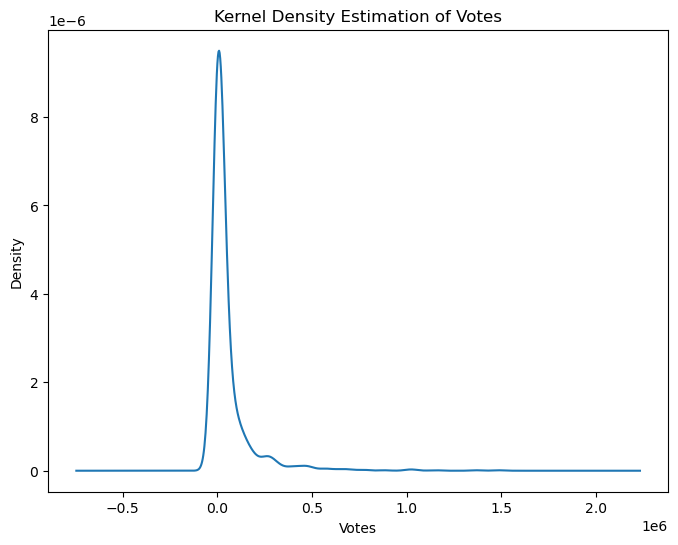

In [49]:
plt.figure(figsize=(8, 6))
df['Votes'].plot(kind='kde')
plt.xlabel('Votes')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Votes')
plt.show()

## Bivariant analysis

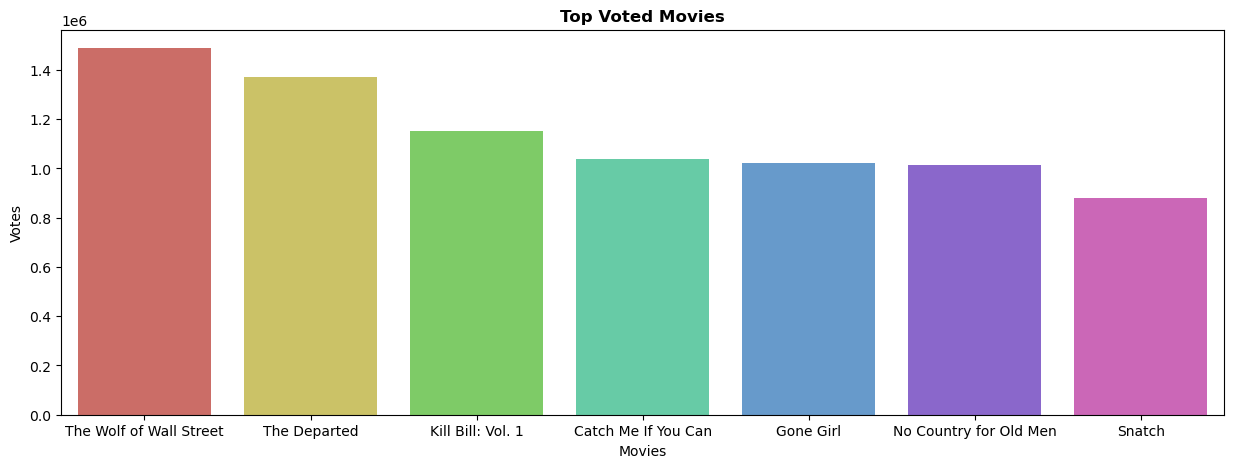

In [50]:
top_voted = df.sort_values(['Votes'], ascending = False)
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies'][:7],y=top_voted['Votes'][:7], palette = 'hls')
g.set_title("Top Voted Movies", weight = "bold")
plt.show()

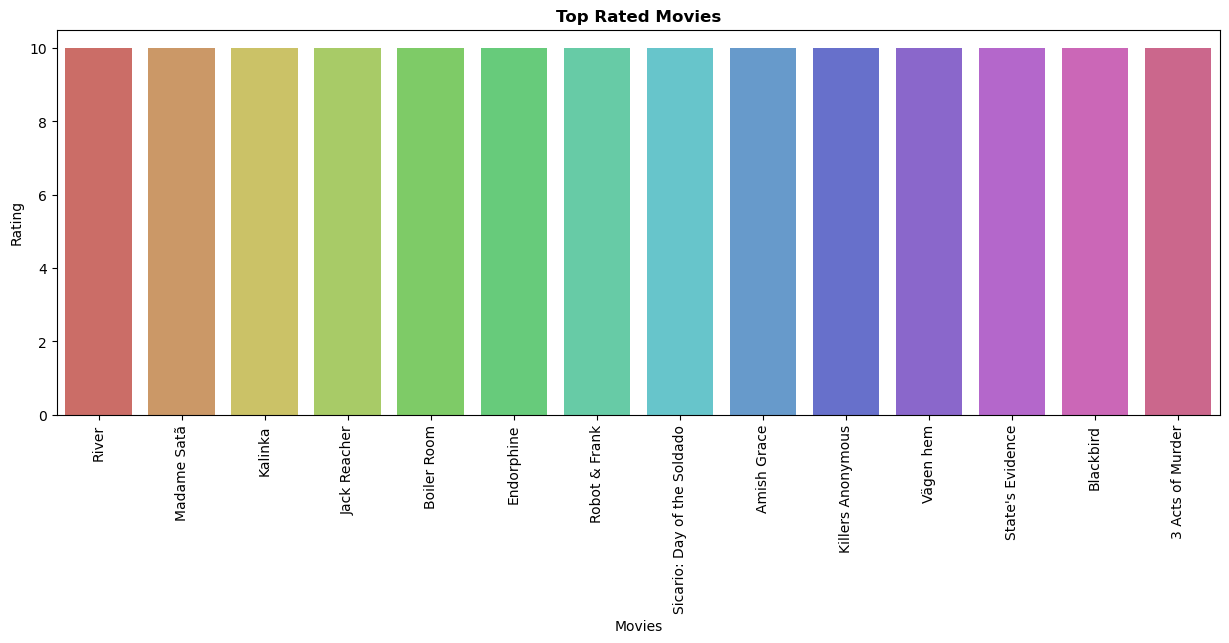

In [51]:
top_Rating = df.sort_values(['Rating'], ascending = False)
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_Rating['Movies'][:14],y=top_Rating['Rating'][:14], palette = 'hls')
g.set_title("Top Rated Movies", weight = "bold")
plt.xticks(rotation=90)
plt.show()

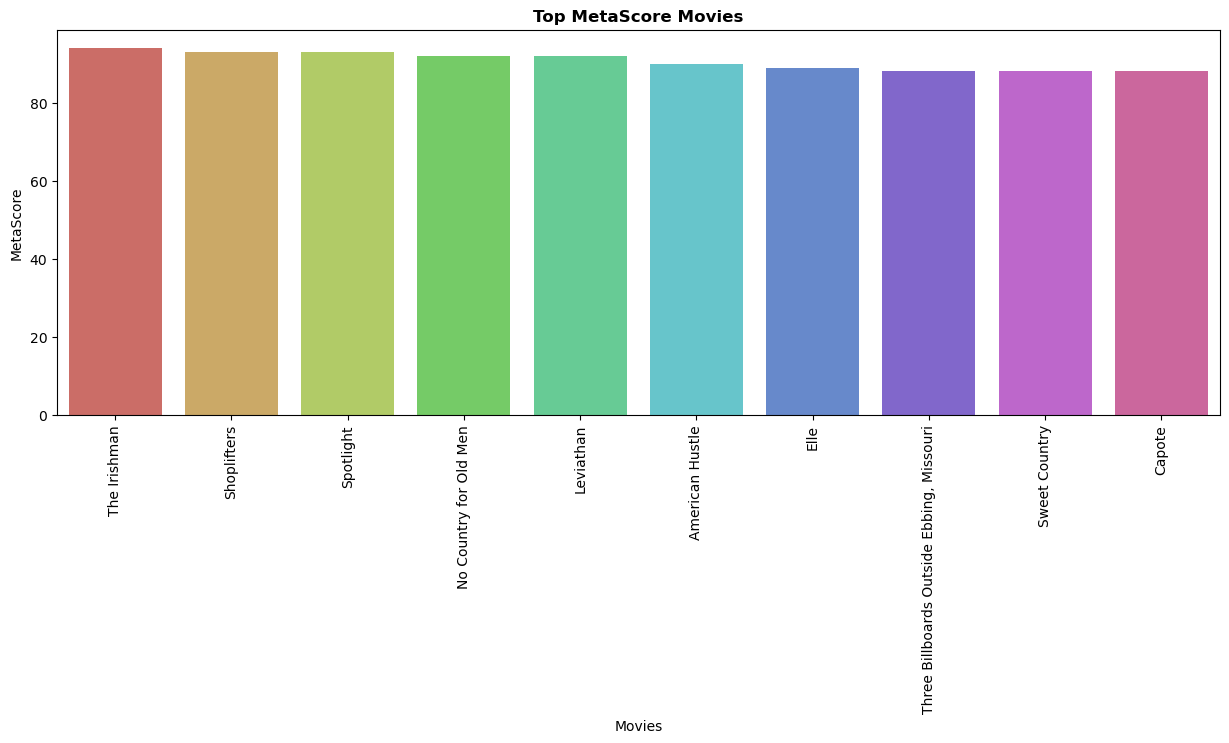

In [52]:
top_voted = df.sort_values(['MetaScore'], ascending = False)
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies'][:10],y=top_voted['MetaScore'][:10], palette = 'hls')
g.set_title("Top MetaScore Movies", weight = "bold")
plt.xticks(rotation=90)
plt.show()

## Bivariant Analysis

#### It categorised into three steps
    1.categorical vs categorical
    2.Categorical vs Numerical
    3.Numerical vs Numerical

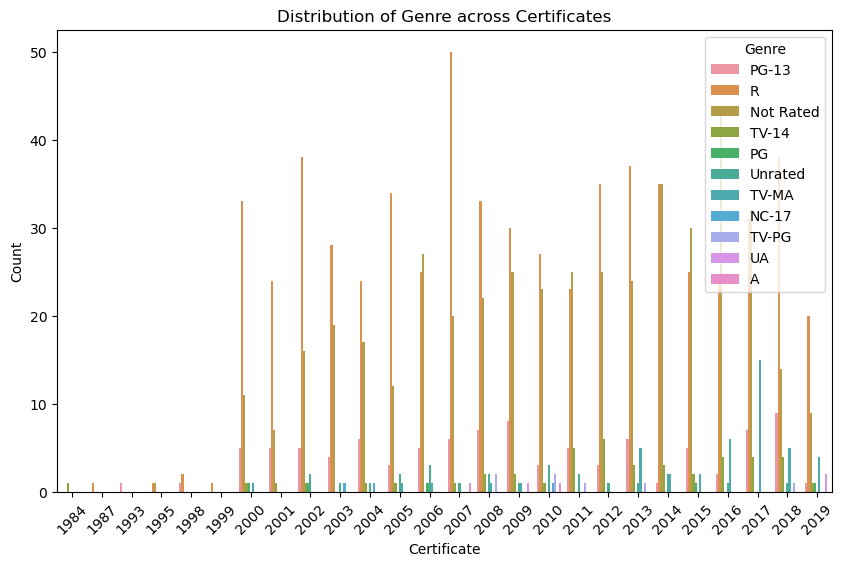

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year_of_Release', hue='Certificate')
plt.xlabel('Certificate')
plt.ylabel('Count')
plt.title('Distribution of Genre across Certificates')
plt.legend(title='Genre', loc='upper right')
plt.xticks(rotation=45)
plt.show()

Axes(0.125,0.11;0.775x0.77)


<Figure size 1000x600 with 0 Axes>

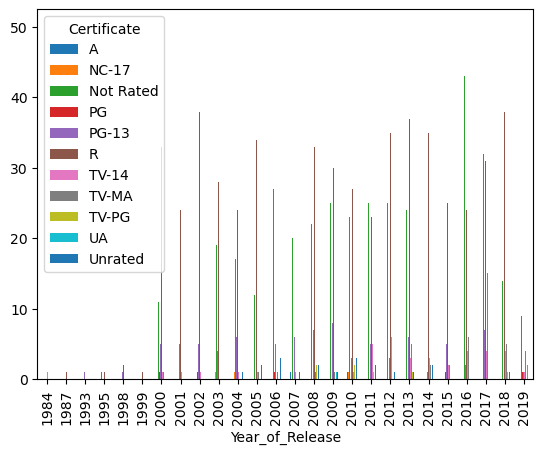

In [54]:
plt.figure(figsize=(10, 6))
cross_tab = pd.crosstab(df['Year_of_Release'], df['Certificate']).plot(kind='bar')
print(cross_tab)

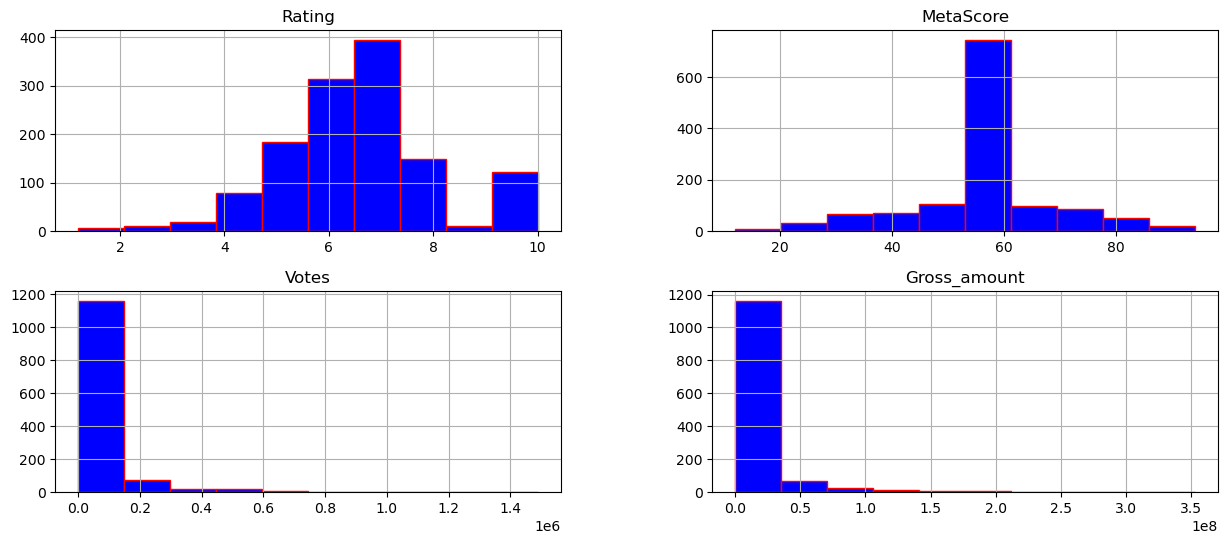

In [55]:
numerical_attributes = ['Rating', 'MetaScore', 'Votes', 'Gross_amount']
df[numerical_attributes].hist(figsize = (15, 6), color = 'blue', edgecolor = 'red', layout = (2, 2));

# Multi variant

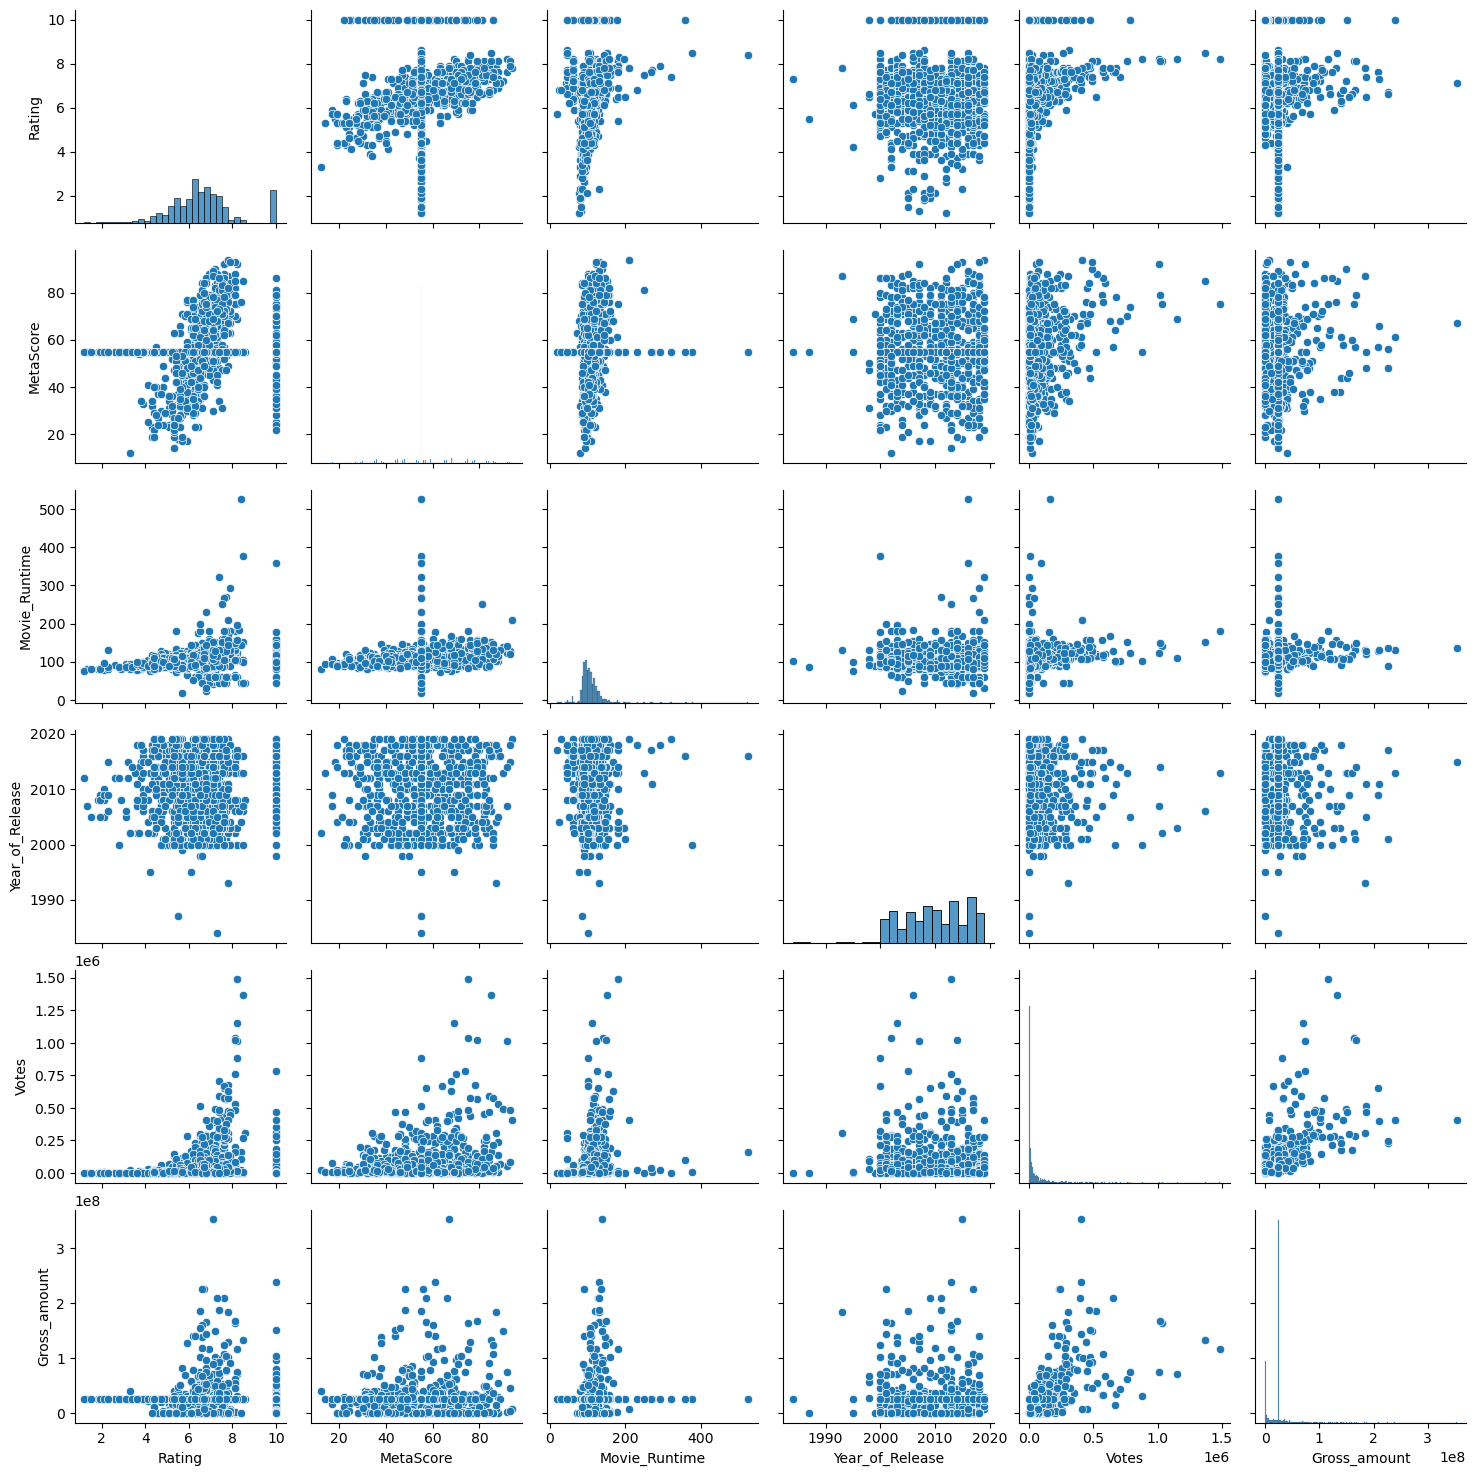

In [56]:
sns.pairplot(df)
plt.show()

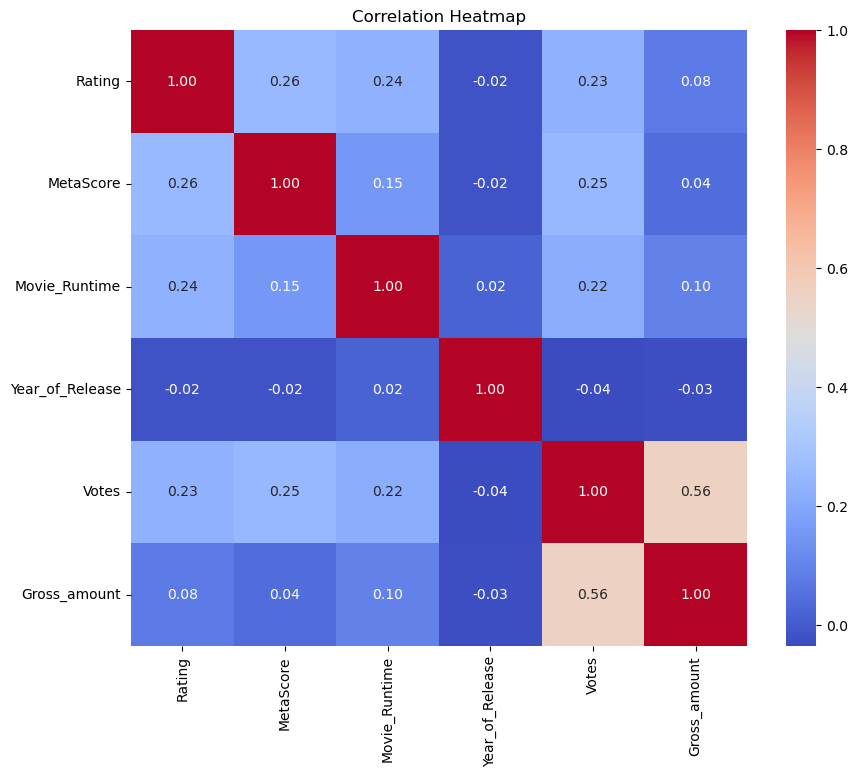

In [57]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1200x1000 with 0 Axes>

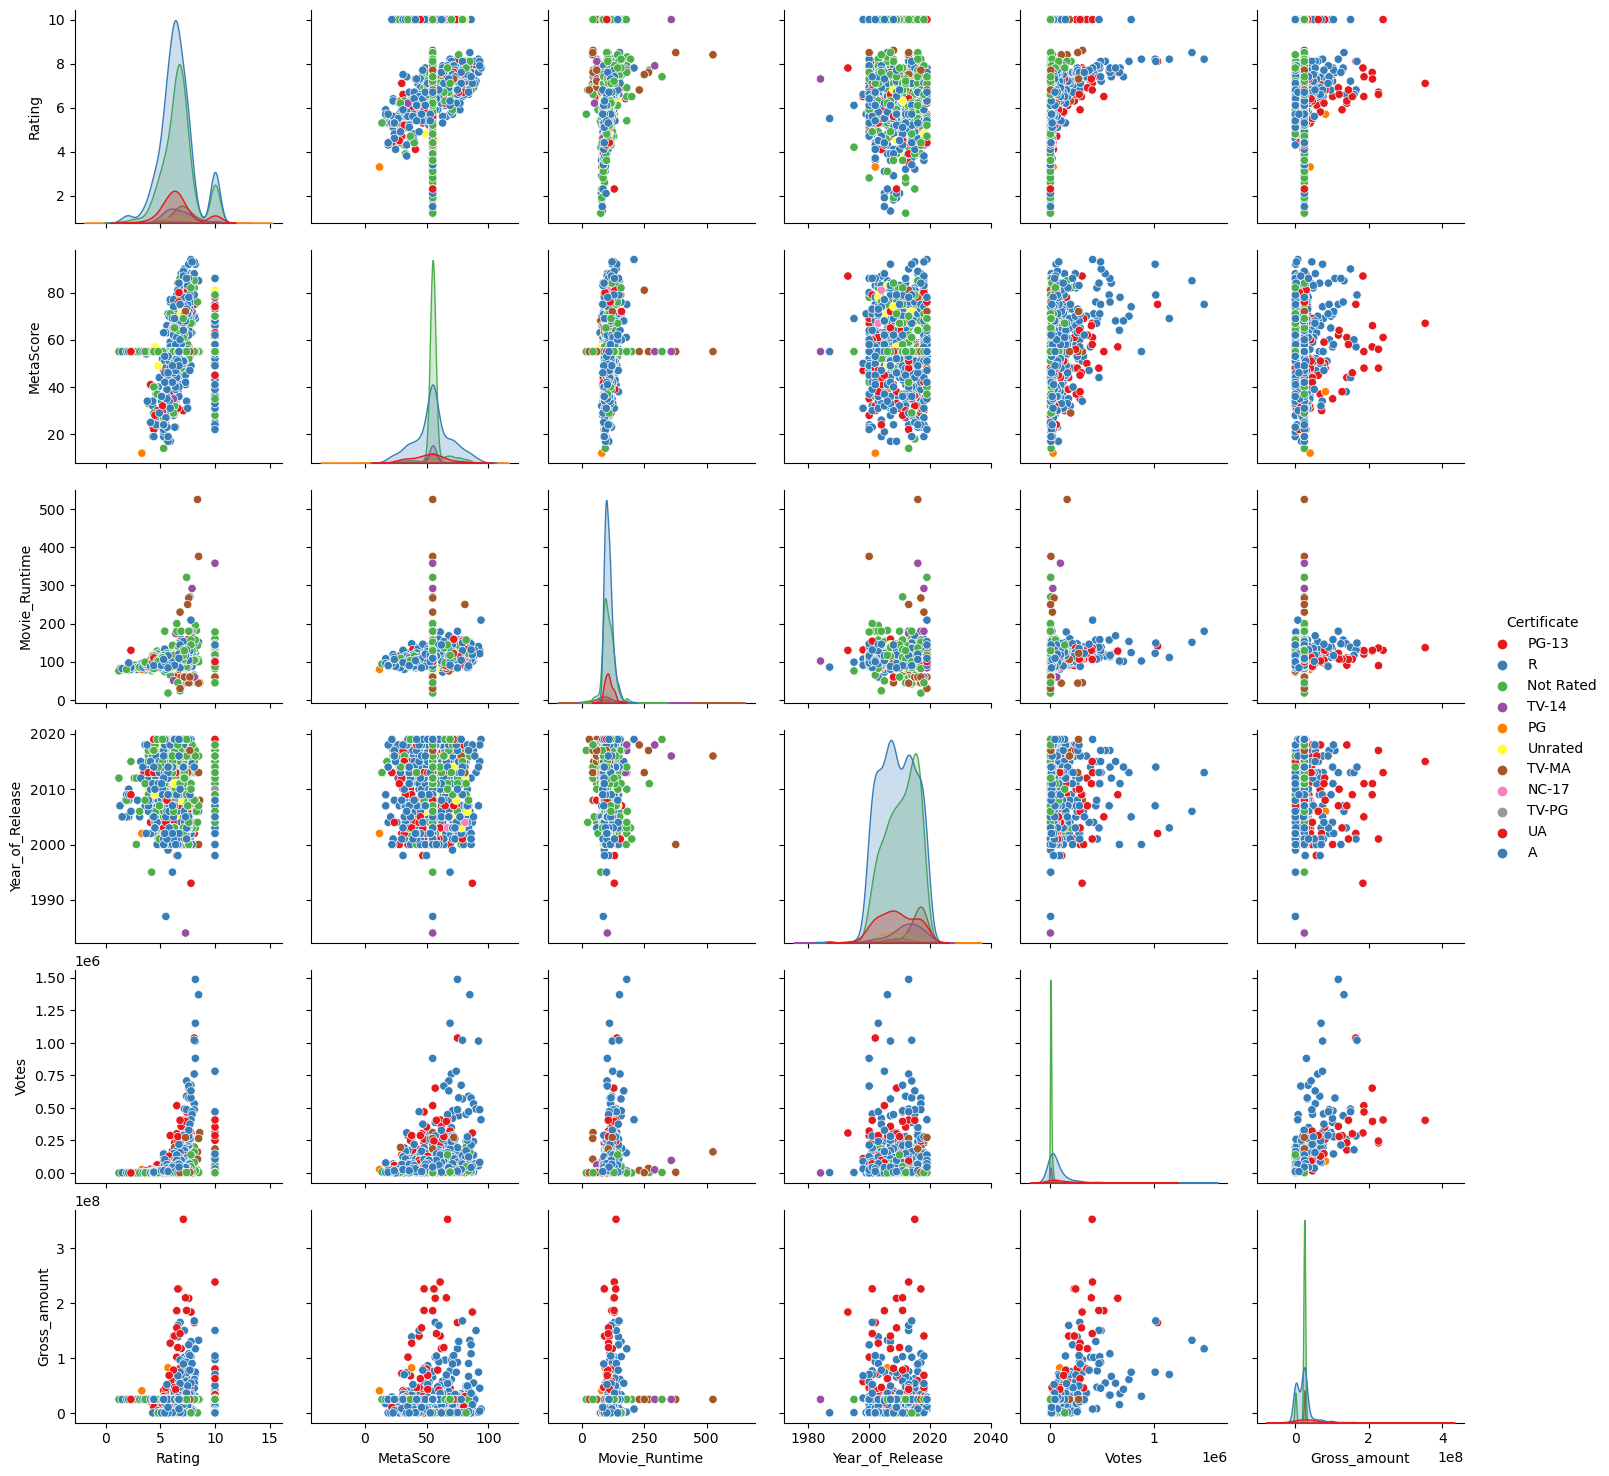

In [58]:
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='Certificate', palette='Set1')
plt.show()

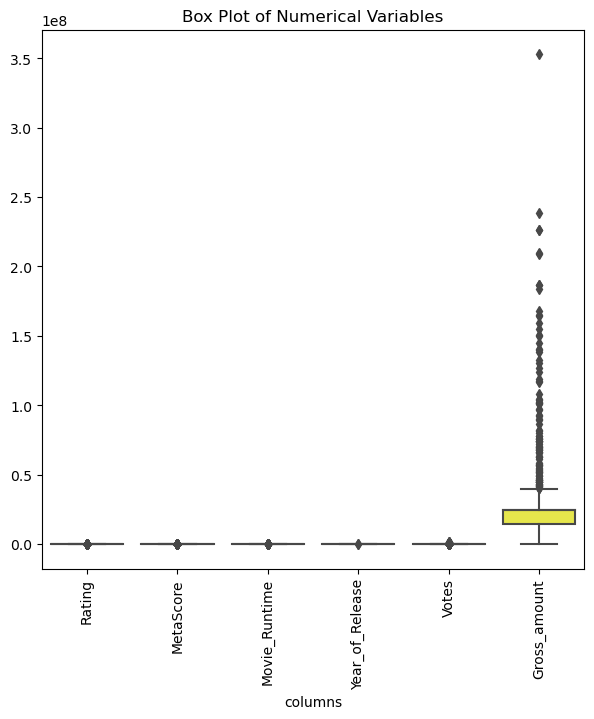

In [59]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=df, orient='v', palette='Set1')
plt.xlabel('columns')
plt.title('Box Plot of Numerical Variables')
plt.xticks(rotation=90)
plt.show()

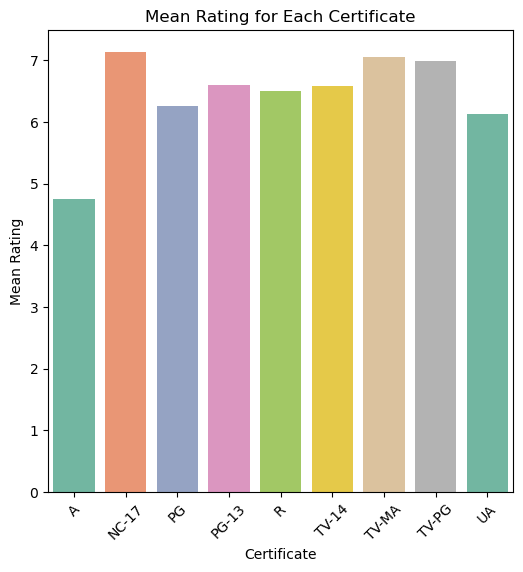

In [60]:
# Exclude 'Unrated' and 'Not Rated' categories from the data
filtered_data = df[~df['Certificate'].isin(['Unrated', 'Not Rated'])]
grouped_data = filtered_data.groupby('Certificate')['Rating'].mean().reset_index()
plt.figure(figsize=(6,6))
sns.barplot(data=grouped_data, x='Certificate', y='Rating', palette='Set2')
plt.xlabel('Certificate')
plt.ylabel('Mean Rating')
plt.title('Mean Rating for Each Certificate')
plt.xticks(rotation=45)
plt.show()

In [61]:
df

Movies  Rating  MetaScore  Movie_Runtime  \
0         16 Blocks     6.6         63            102   
1           Hostage     6.5         44            113   
2        Layer Cake     7.3         73            105   
3           Lawless     7.2         58            116   
4          Child 44     6.4         41            137   
...             ...     ...        ...            ...   
1295  Before We Die     7.7         55             60   
1296            DNA     7.4         55            321   
1297     The Lawyer    10.0         55             45   
1298  The Good Liar     6.7         55            109   
1299   Next Day Air     5.7         46             84   

                         Genre  Year_of_Release   Votes  Gross_amount  \
0      Action, Drama, Thriller             2006  133165      36900000   
1         Action, Crime, Drama             2005  112468      34640000   
2         Action, Crime, Drama             2004  189380       2340000   
3      Biography, Crime, Drama             2012  248397      37400000   
4        Crime, Drama, History             2015   73920       1210000   
...                        ...              ...     ...           ...   
1295  Drama, Mystery, Thriller             2017    4635      24641675   
1296     Crime, Drama, Mystery             2019    3220      24641675   
1297     Crime, Drama, Mystery             2018    1826      24641675   
1298     Crime, Drama, Mystery             2019   45114      24641675   
1299     Action, Comedy, Crime             2009   10987      10020000   

     Certificate  
0          PG-13  
1              R  
2              R  
3              R  
4              R  
...          ...  
1295       TV-MA  
1296   Not Rated  
1297   Not Rated  
1298           R  
1299           R  

[1286 rows x 9 columns]

In [62]:
grouped_data = filtered_data.groupby('Certificate')['Rating'].mean()
grouped_data

Certificate
A        4.750000
NC-17    7.133333
PG       6.260000
PG-13    6.590816
R        6.495153
TV-14    6.579545
TV-MA    7.050000
TV-PG    6.985714
UA       6.133333
Name: Rating, dtype: float64

2009


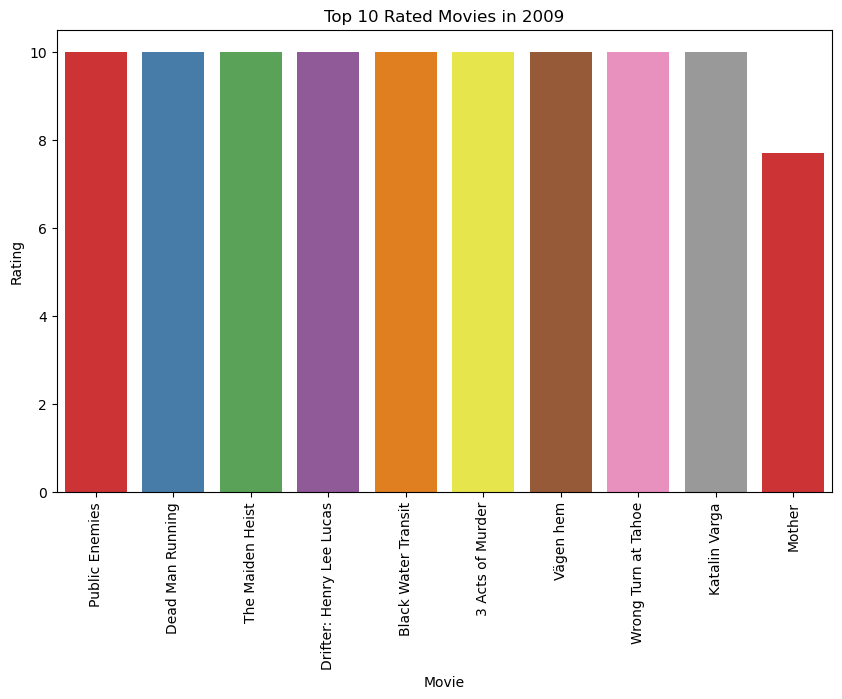

In [63]:
# Specify the year you want to see
target_year =int(input()) # year must be in between 2000 to 2022

# Filter the data for the specified year
movies_in_target_year = df[df['Year_of_Release'] == target_year]
# Sort the movies by rating in descending order and select the top 5 rated movies
top_rated_movies = movies_in_target_year.nlargest(10, 'Rating')

# Create a bar graph to visualize the top 5 rated movies for the specified year
plt.figure(figsize=(10, 6))
sns.barplot(x='Movies', y='Rating', data=top_rated_movies, palette='Set1')
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.title(f'Top 10 Rated Movies in {target_year}')
plt.xticks(rotation=90)
plt.show()

2008


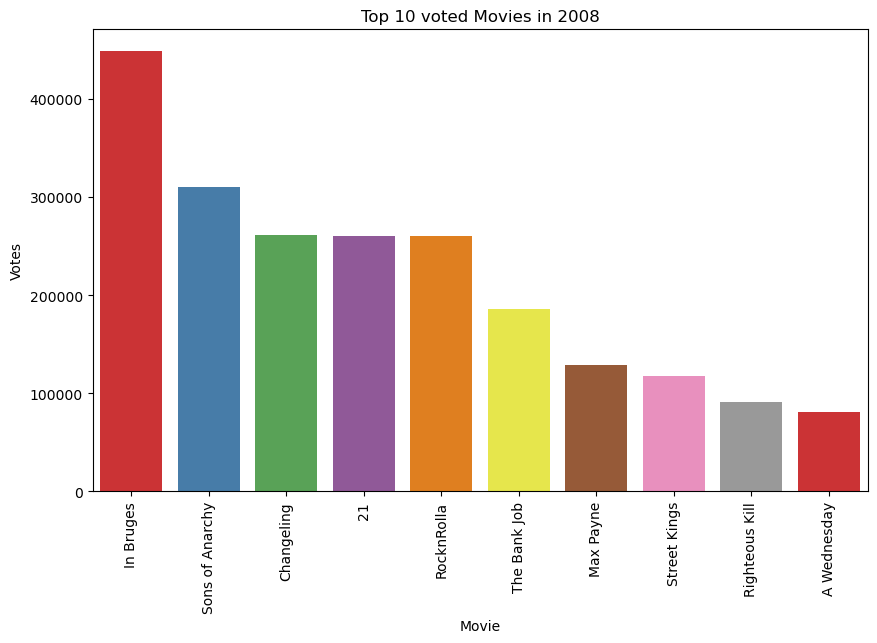

In [64]:
# Specify the year you want to see
target_year =int(input()) # year must be in between 2000 to 2022

# Filter the data for the specified year

movies_in_target_year = df[df['Year_of_Release'] == target_year]
# Sort the movies by rating in descending order and select the top 5 rated movies
top_rated_movies = movies_in_target_year.nlargest(10, 'Votes')

# Create a bar graph to visualize the top 5 rated movies for the specified year
plt.figure(figsize=(10, 6))
sns.barplot(x='Movies', y='Votes', data=top_rated_movies, palette='Set1')
plt.xlabel('Movie')
plt.ylabel('Votes')
plt.title(f'Top 10 voted Movies in {target_year}')
plt.xticks(rotation=90)
plt.show()

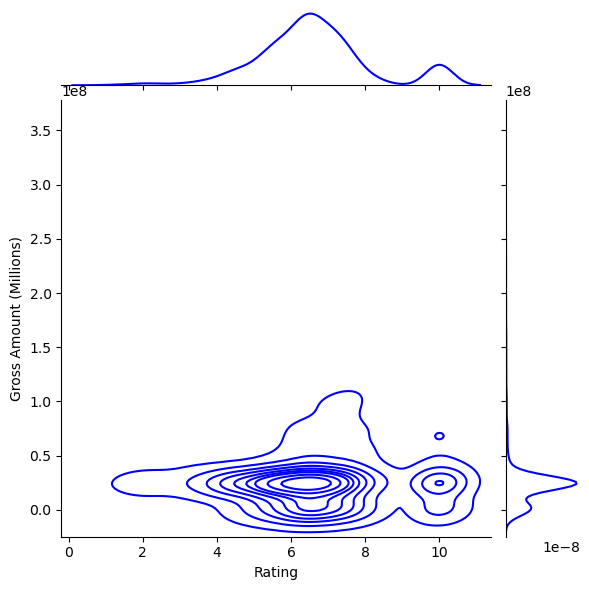

In [65]:
# Create a jointplot to visualize the relationship between 'Rating' and 'Gross_amount'
sns.jointplot(x='Rating', y='Gross_amount', data=df, kind='kde', color='b')
plt.xlabel('Rating')
plt.ylabel('Gross Amount (Millions)')
plt.title('Relationship between Rating and Gross Amount')
plt.show()

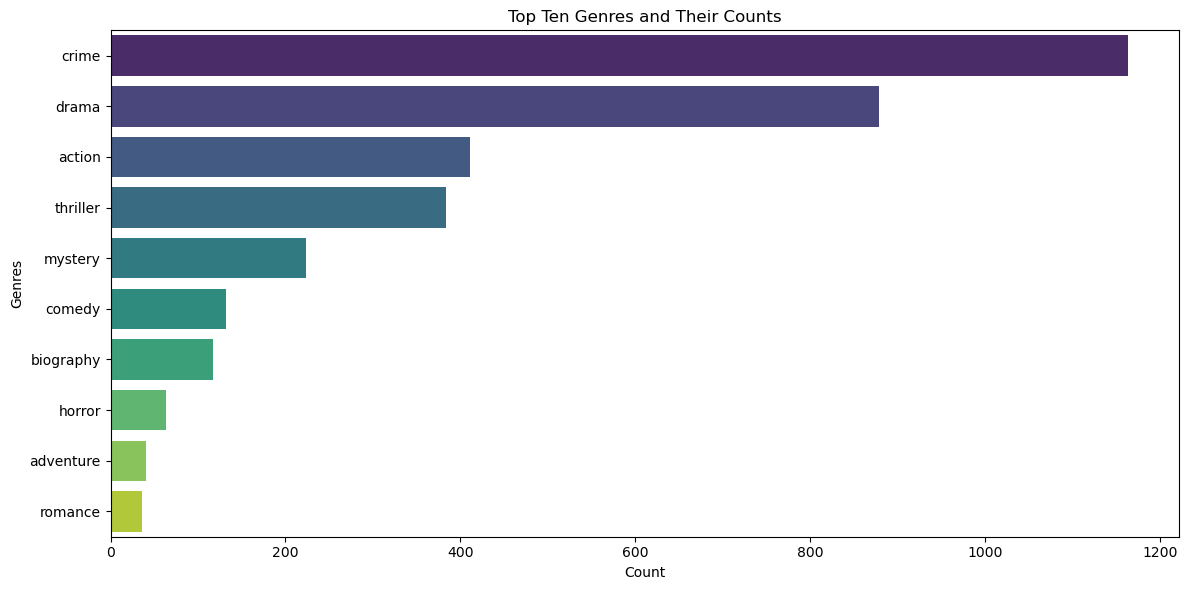

In [66]:
# Extract and count the occurrences of each genre in the 'Genre' column
genre_count = Counter([genre.strip().lower() for x in df['Genre'] for genre in x.split(',')])

# Get the top ten genres and their counts
top_genres = genre_count.most_common(10)
top_genres_names, top_genres_counts = zip(*top_genres)

# Create a DataFrame with the top ten genres and their counts
top_genres_df = pd.DataFrame({'Genre': top_genres_names, 'Count': top_genres_counts})

# Sort the DataFrame by the count in descending order
top_genres_df = top_genres_df.sort_values(by='Count', ascending=False)

# Create a stacked bar plot to visualize the top ten genres and their counts
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Genre', data=top_genres_df, palette='viridis', estimator=sum)
plt.xlabel('Count')
plt.ylabel('Genres')
plt.title('Top Ten Genres and Their Counts')
plt.tight_layout()
plt.show()


In [67]:
df

Movies  Rating  MetaScore  Movie_Runtime  \
0         16 Blocks     6.6         63            102   
1           Hostage     6.5         44            113   
2        Layer Cake     7.3         73            105   
3           Lawless     7.2         58            116   
4          Child 44     6.4         41            137   
...             ...     ...        ...            ...   
1295  Before We Die     7.7         55             60   
1296            DNA     7.4         55            321   
1297     The Lawyer    10.0         55             45   
1298  The Good Liar     6.7         55            109   
1299   Next Day Air     5.7         46             84   

                         Genre  Year_of_Release   Votes  Gross_amount  \
0      Action, Drama, Thriller             2006  133165      36900000   
1         Action, Crime, Drama             2005  112468      34640000   
2         Action, Crime, Drama             2004  189380       2340000   
3      Biography, Crime, Drama             2012  248397      37400000   
4        Crime, Drama, History             2015   73920       1210000   
...                        ...              ...     ...           ...   
1295  Drama, Mystery, Thriller             2017    4635      24641675   
1296     Crime, Drama, Mystery             2019    3220      24641675   
1297     Crime, Drama, Mystery             2018    1826      24641675   
1298     Crime, Drama, Mystery             2019   45114      24641675   
1299     Action, Comedy, Crime             2009   10987      10020000   

     Certificate  
0          PG-13  
1              R  
2              R  
3              R  
4              R  
...          ...  
1295       TV-MA  
1296   Not Rated  
1297   Not Rated  
1298           R  
1299           R  

[1286 rows x 9 columns]

In [68]:
# Filter movies with high ratings (greater than or equal to 8) and high metascore (greater than or equal to 80)
high_rated_movies = df[(df['Rating'] >= 8) & (df['MetaScore'] >= 80)]
high_rated_movies

Movies  Rating  MetaScore  \
5                                 The Departed     8.5         85   
9                       No Country for Old Men     8.2         92   
166                                      A War    10.0         81   
167  Three Billboards Outside Ebbing, Missouri     8.1         88   
231                                  Spotlight     8.1         93   
257                         Memories of Murder     8.1         82   
311                                   Drug War    10.0         86   
359                                     Sister    10.0         81   
403                             The Handmaiden     8.1         85   

     Movie_Runtime                     Genre  Year_of_Release    Votes  \
5              151    Crime, Drama, Thriller             2006  1370399   
9              122    Crime, Drama, Thriller             2007  1014145   
166            115    Crime, Drama, Thriller             2015    10971   
167            115      Comedy, Crime, Drama             2017   531873   
231            129   Biography, Crime, Drama             2015   486429   
257            132     Crime, Drama, Mystery             2003   199921   
311            107      Action, Crime, Drama             2012    10614   
359             97              Crime, Drama             2012     7075   
403            145  Drama, Romance, Thriller             2016   160179   

     Gross_amount Certificate  
5       132380000           R  
9        74280000           R  
166        120000           R  
167      54510000           R  
231      45060000           R  
257         10000   Not Rated  
311        130000           R  
359      24641675     Unrated  
403       2009999   Not Rated

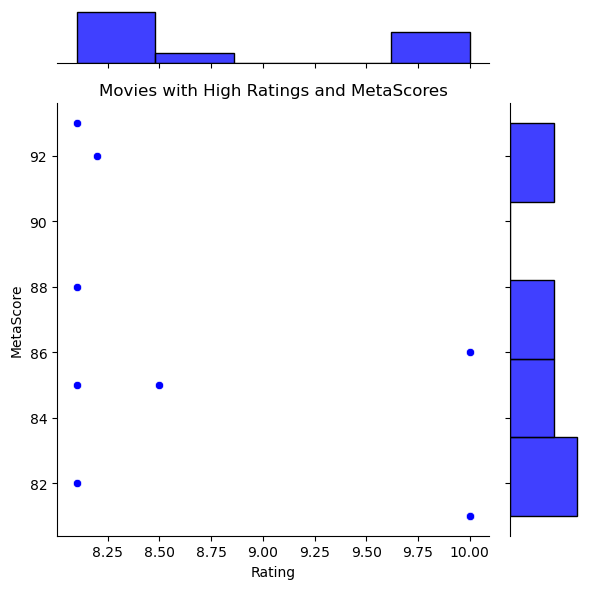

In [69]:
# Create a jointplot to visualize the relationship between Rating and MetaScore
sns.jointplot(x='Rating', y='MetaScore', data=high_rated_movies, kind='scatter', color='b')
plt.xlabel('Rating')
plt.ylabel('MetaScore')
plt.title('Movies with High Ratings and MetaScores')
plt.tight_layout()
plt.show()

In [70]:
df['Certificate'].unique()

array(['PG-13', 'R', 'Not Rated', 'TV-14', 'PG', 'Unrated', 'TV-MA',
       'NC-17', 'TV-PG', 'UA', 'A'], dtype=object)

In [71]:
a=df.groupby("Year_of_Release").get_group(2007)

In [72]:
a

Movies  Rating  MetaScore  Movie_Runtime  \
9         No Country for Old Men     8.2         92            122   
17                 Paranoid Park     6.6         84             85   
18       Rise of the Footsoldier     6.8         55            119   
25                        Outlaw     5.7         45            103   
43             American Gangster     7.8         76            157   
...                          ...     ...        ...            ...   
1109              The Third Nail     4.9         55             91   
1164                Married Life     6.2         65             91   
1175  Milan Palermo - The Return     4.9         55             95   
1264               Room of Death     6.3         55            115   
1279                     Cleaner     6.1         49             88   

                         Genre  Year_of_Release    Votes  Gross_amount  \
9       Crime, Drama, Thriller             2007  1014145      74280000   
17       Crime, Drama, Mystery             2007    31438        490000   
18    Action, Biography, Crime             2007    21282      24641675   
25        Action, Crime, Drama             2007    12693      24641675   
43     Biography, Crime, Drama             2007   439717     130160000   
...                        ...              ...      ...           ...   
1109              Crime, Drama             2007      316      24641675   
1164   Biography, Crime, Drama             2007     9606       1510000   
1175      Action, Crime, Drama             2007      270      24641675   
1264  Crime, Mystery, Thriller             2007     1824      24641675   
1279           Crime, Thriller             2007    44639      24641675   

     Certificate  
9              R  
17             R  
18             R  
25             R  
43             R  
...          ...  
1109   Not Rated  
1164       PG-13  
1175   Not Rated  
1264   Not Rated  
1279           R  

[79 rows x 9 columns]

In [74]:
df[df["Certificate"]=="UA"] # CLEARLY IT SHOWS ONLY THREE MOVIES IN THE ENTIRE DATA ARE UA CERTIFIED MOVIEIES THAT ARE Hawaa,
#The Wild Goose Lake #The Stoneman Murders


Movies  Rating  MetaScore  Movie_Runtime  \
630   The Stoneman Murders     7.3         55             95   
1224   The Wild Goose Lake     6.7         76            113   
1267                 Hawaa     4.4         55            110   

                      Genre  Year_of_Release  Votes  Gross_amount Certificate  
630   Crime, Drama, Mystery             2009   3331      24641675          UA  
1224           Crime, Drama             2019   7512      24641675          UA  
1267                  Crime             2019    228      24641675          UA

In [76]:
df[df["Certificate"]=="R"]

Movies  Rating  MetaScore  Movie_Runtime  \
1               Hostage     6.5         44            113   
2            Layer Cake     7.3         73            105   
3               Lawless     7.2         58            116   
4              Child 44     6.4         41            137   
5          The Departed     8.5         85            151   
...                 ...     ...        ...            ...   
1289  The Son of No One     5.1         36             90   
1290      People I Know     5.4         53            100   
1291         Misconduct     5.3         24            106   
1298      The Good Liar     6.7         55            109   
1299       Next Day Air     5.7         46             84   

                        Genre  Year_of_Release    Votes  Gross_amount  \
1        Action, Crime, Drama             2005   112468      34640000   
2        Action, Crime, Drama             2004   189380       2340000   
3     Biography, Crime, Drama             2012   248397      37400000   
4       Crime, Drama, History             2015    73920       1210000   
5      Crime, Drama, Thriller             2006  1370399     132380000   
...                       ...              ...      ...           ...   
1289     Action, Crime, Drama             2011    17559         30000   
1290    Crime, Drama, Mystery             2002    11632        120000   
1291    Crime, Drama, Mystery             2016    17293      24641675   
1298    Crime, Drama, Mystery             2019    45114      24641675   
1299    Action, Comedy, Crime             2009    10987      10020000   

     Certificate  
1              R  
2              R  
3              R  
4              R  
5              R  
...          ...  
1289           R  
1290           R  
1291           R  
1298           R  
1299           R  

[619 rows x 9 columns]

In [84]:
data=df[df['Certificate']=='R']
toprated_in_R=data.sort_values(by='Rating',ascending=False)

In [88]:
toprated_in_R.head(12)

Movies  Rating  MetaScore  Movie_Runtime  \
539  The Angels' Share    10.0         66            101   
833         Green Room    10.0         79             95   
128     Righteous Kill    10.0         36            101   
382   Dead Man Running    10.0         55             92   
994         Hard Candy    10.0         58            104   
722              Gerry    10.0         54            103   
229    The Infiltrator    10.0         66            127   
122      The Foreigner    10.0         55            113   
947        Elite Squad    10.0         33            115   
729        Dark Matter    10.0         49             88   
376       Paid in Full    10.0         49             97   
763         Bordertown    10.0         55            112   

                         Genre  Year_of_Release   Votes  Gross_amount  \
539       Comedy, Crime, Drama             2012   26302        300000   
833       Crime, Drama, Horror             2015  132913       3220000   
128   Crime, Mystery, Thriller             2008   90563      40080000   
382       Action, Crime, Drama             2009    4412      24641675   
994            Drama, Thriller             2005  164881       1010000   
722  Adventure, Drama, Mystery             2002   19364        240000   
229    Biography, Crime, Drama             2016   76661      15430000   
122           Action, Thriller             2017  119310      34390000   
947       Action, Crime, Drama             2007  107364         10000   
729                      Drama             2007    3582         30000   
376       Action, Crime, Drama             2002   13534       3040000   
763   Crime, Mystery, Thriller             2007   11163      24641675   

    Certificate  
539           R  
833           R  
128           R  
382           R  
994           R  
722           R  
229           R  
122           R  
947           R  
729           R  
376           R  
763           R